In [1]:
# 초기 파일세팅 
# input / output 파일 생성
import os

# 폴더 생성 (기존재시 pass)
os.makedirs('./input',  exist_ok=True)
os.makedirs('./output', exist_ok=True)

### Data Fields

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

#### 분류와 회귀중 회귀와 관련된 문제 -> 자전거 대여량을 예측하는 문제이기 때문


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#노트북안에 그래프 그리기 위함
%matplotlib inline
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일로
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지지 않기 위함
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df_train  = pd.read_csv('input/train.csv', parse_dates=["datetime"]) # train파일의 datatime 형식으로 불러온다
df_train.shape

(10886, 12)

In [8]:
# df_train.columns
df_train.dtypes


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [9]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df_train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [12]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

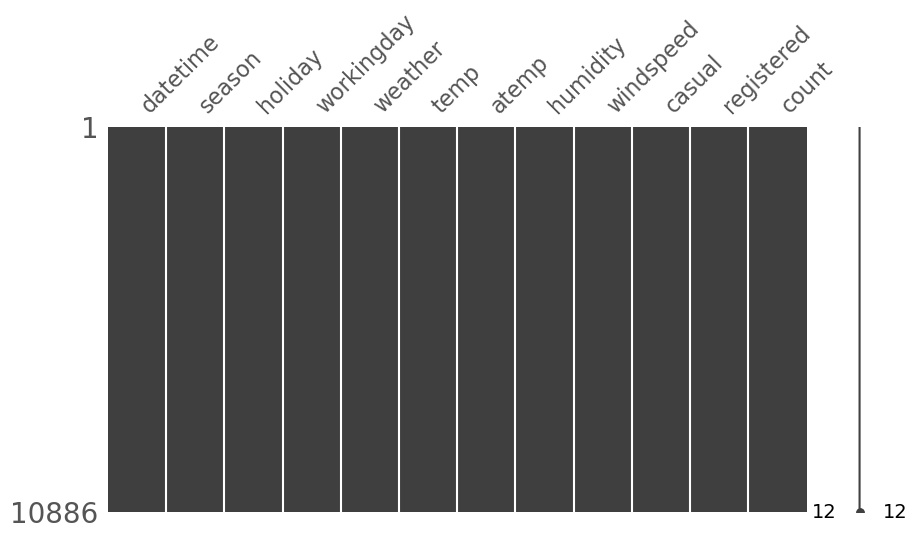

In [16]:
import missingno as msno

msno.matrix(df_train, figsize=(10,5))

In [17]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

In [18]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/Users/idohyeong/anaconda3/lib/python3.11/site-packages/IPython/core/event

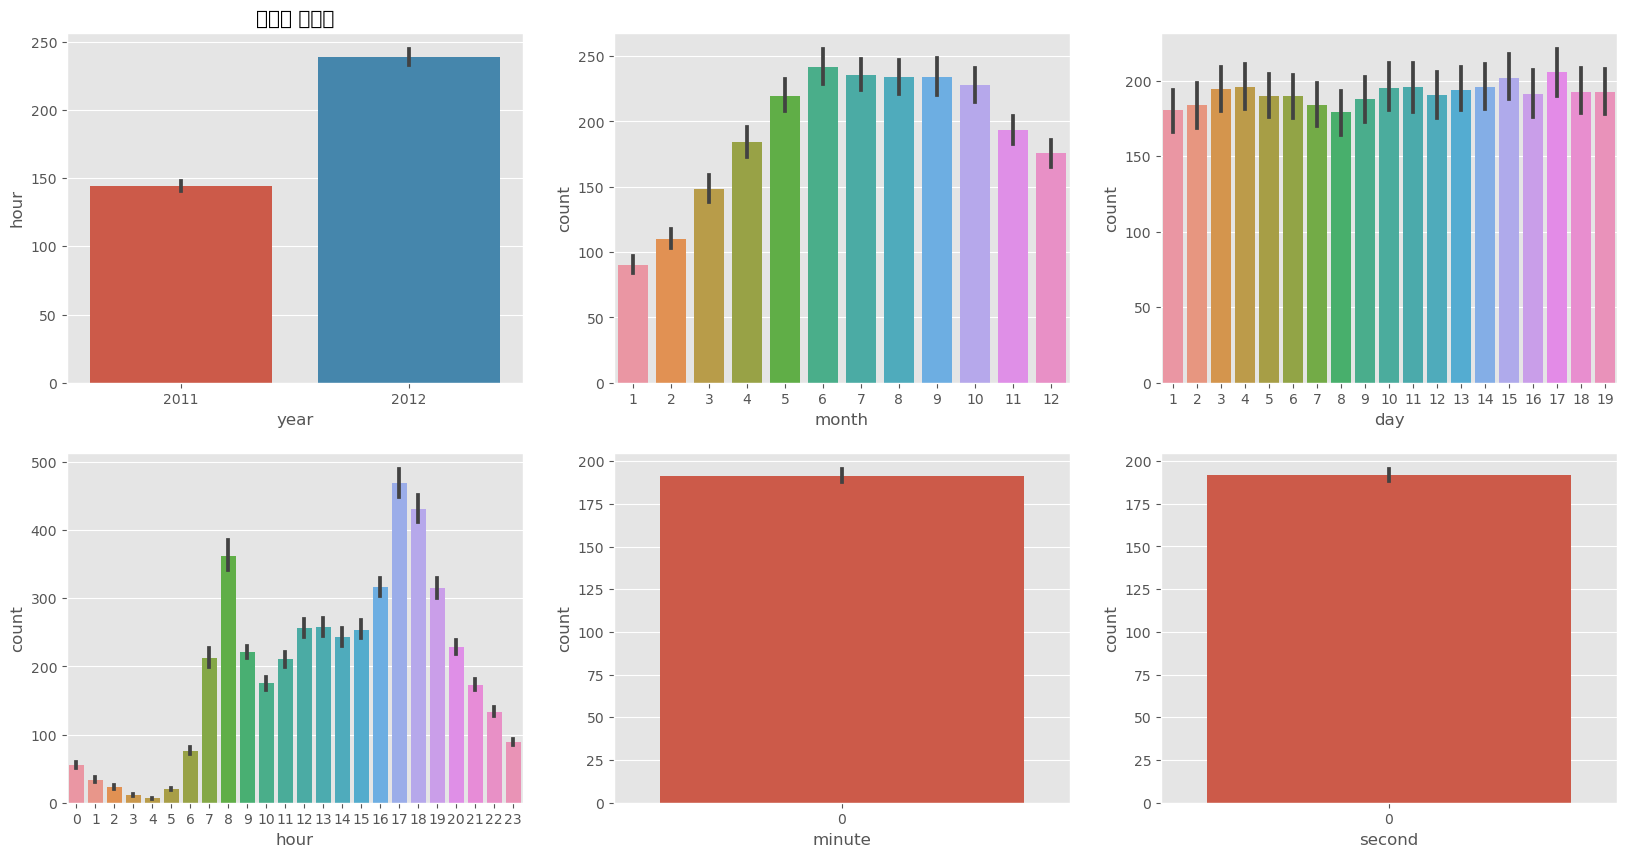

In [23]:
# 6개의 figure
figure, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)

sns.barplot(data=df_train, x='year', y='count', ax=ax1)
sns.barplot(data=df_train, x='month', y='count', ax=ax2)
sns.barplot(data=df_train, x='day', y='count', ax=ax3)
sns.barplot(data=df_train, x='hour', y='count', ax=ax4)
sns.barplot(data=df_train, x='minute', y='count', ax=ax5)
sns.barplot(data=df_train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax1.set(ylabel='month', title='월별 대여량')
ax1.set(ylabel='day', title='일별 대여량')
ax1.set(ylabel='hour', title='시간별 대여량')